# Anti-Spam - Preliminary data processing

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
import re

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## _SMS Spam Collection_

In [3]:
df_sms = pd.read_csv("drive/MyDrive/NLP_datasets/SMSspamcollection/SMSSpamCollection",sep='\t',names=['cat','txt'])
df_sms.head()

,cat,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


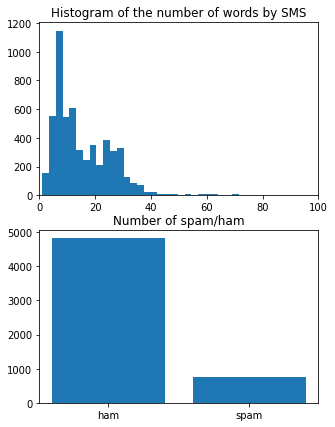

In [4]:
number_of_words = df_sms['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 70)
plt.xlim([0,100])
plt.title("Histogram of the number of words by SMS")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_sms['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Enron

In [5]:
df_enr = pd.DataFrame(columns=['cat', 'sub', 'txt'])
#df = df.append({'cat':'test_cat', 'sub':'test_sub', 'txt':'test_txt'}, ignore_index=True)

# Insert ham mails
dir_enron_ham = 'drive/MyDrive/NLP_datasets/enron/ham'
for filename in os.listdir(dir_enron_ham):
  with open(os.path.join(dir_enron_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
    list_text = f.readlines()
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

# Insert spam mails
dir_enron_spam = 'drive/MyDrive/NLP_datasets/enron/spam'
for filename in os.listdir(dir_enron_spam):
  with open(os.path.join(dir_enron_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
    try:
      list_text = f.readlines()
    except:
      print(filename)
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

df_enr.head()

,cat,sub,txt
0,ham,updated q & as for enron employees,updated questions and answers for enron employ...
1,ham,http : / / hrweb . enron . com / benefits / fo...,
2,ham,united way 2001 - building houston ' s future,"building houston ' s future , enron ' s 2001 u..."
3,ham,fw : tw rofr,"fyi , kim .\n - - - - - original message - - -..."
4,ham,br / tw window rock meeting scheduled for dec ...,"michelle ,\n we are looking forward to the pla..."


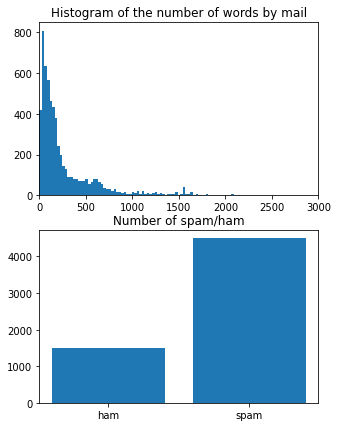

In [6]:
number_of_words = df_enr['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 200)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_enr['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Spam Assassin

In [7]:
df_ass = pd.DataFrame(columns=['cat', 'sub', 'txt'])
re_sub = re.compile('[Ss]ubject ?:')

# Insert ham mails

dirs_ham = ['easy_ham', 'easy_ham_2']
for dir_ext in dirs_ham:
  dir_spamassassin_ham = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_ham):
    with open(os.path.join(dir_spamassassin_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
      sub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df_ass = df_ass.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

In [8]:
# Insert spam mails
dirs_spam = ['spam', 'spam_2']
for dir_ext in dirs_spam:
  dir_spamassassin_spam = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_spam):
    with open(os.path.join(dir_spamassassin_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
      ub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df_ass = df_ass.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

df_ass.head()

,cat,sub,txt
0,ham,[SAdev] [Bug 1008] SpamAssassin does not work...,http://www.hughes-family.org/bugzilla/show_bug...
1,ham,[SAdev] [Bug 839] mailbox corruption not fixe...,http://www.hughes-family.org/bugzilla/show_bug...
2,ham,[Spambayes] test sets?,">>>>> ""GvR"" == Guido van Rossum <guido@python..."
3,ham,Re: [Razor-users] Razor with sendmail,"""Bort, Paul"" <pbort@tmwsystems.com> wrote: >If..."
4,ham,Jeremy Zawodny who works at Yahoo Finance off...,URL: http://scriptingnews.userland.com/backiss...


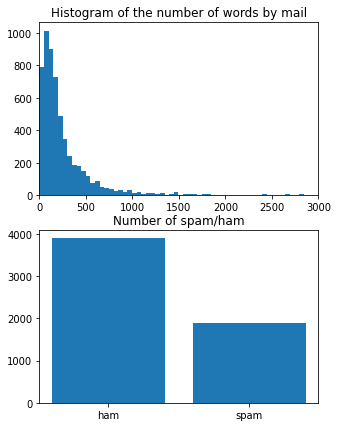

In [9]:
number_of_words = df_ass['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 300)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_ass['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Preprocessing

In [79]:
def preprocessing(df, bool_sub):
  # Lowercase
  txt_tkn = df['txt'].str.lower()
  if bool_sub: 
    sub_tkn = df['sub'].str.lower()

  # Tokenize
  new_stopwords = ['enron', 'com', 'http', 'nbsp']
  stop_words = set(stopwords.words('english') + new_stopwords)

  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  tokenized_txt = []
  for str in txt_tkn:
    
    str = re.sub(r'<.+?>', '', str)
    str = re.sub(r'\S*https?:\S*', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)
    str = re.sub('email', 'mail', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if (not w in stop_words and len(w)>2)]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_txt.append(words)

  df['txt_tkn'] = tokenized_txt

  # sub
  tokenized_sub = []
  for str in sub_tkn:
    
    str = re.sub(r'<.+?>', '', str)
    str = re.sub(r'\S*https?:\S*', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)
    str = re.sub('email', 'mail', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if (not w in stop_words and len(w)>2)]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_sub.append(words)

  df['sub_tkn'] = tokenized_sub

In [80]:

preprocessing(df_ass, True)
df_ass

,cat,sub,txt,txt_tkn,sub_tkn
0,ham,[SAdev] [Bug 1008] SpamAssassin does not work...,http://www.hughes-family.org/bugzilla/show_bug...,"[jmason, org, change, remove, add, status, new...","[sadev, bug, spamassassin, work, glance]"
1,ham,[SAdev] [Bug 839] mailbox corruption not fixe...,http://www.hughes-family.org/bugzilla/show_bug...,"[additional, comment, alan, rdrop, try, yet, r...","[sadev, bug, mailbox, corruption, fix, procmail]"
2,ham,[Spambayes] test sets?,">>>>> ""GvR"" == Guido van Rossum <guido@python...","[gvr, guido, van, rossum, write, gvr, perhaps,...","[spambayes, test, set]"
3,ham,Re: [Razor-users] Razor with sendmail,"""Bort, Paul"" <pbort@tmwsystems.com> wrote: >If...","[bort, paul, write, sendmail, compile, milter,...","[razor, user, razor, sendmail]"
4,ham,Jeremy Zawodny who works at Yahoo Finance off...,URL: http://scriptingnews.userland.com/backiss...,"[url, date, mon, sep, gmt, jeremy, zawodny, wo...","[jeremy, zawodny, work, yahoo, finance, offer,..."
...,...,...,...,...,...
5791,spam,Turn Your PayPal account into a Non-Stop Cash...,I am sending you this message because we have ...,"[send, message, communicate, past, business, o...","[turn, paypal, account, non, stop, cash, machi..."
5792,spam,Stop creditors in their tracks 10891,** 5 FREE eBooks JUST FOR SIGNING UP. Sent via...,"[free, ebooks, sign, send, via, mail, within, ...","[stop, creditor, track]"
5793,spam,Online Approval for $5000 Now,<HTML><HEAD><TITLE>Free Card Search</TITLE> <M...,"[free, card, search, sincerely, new, offer, st...","[online, approval]"
5794,spam,hello,FROM=SEKO MOSHOOD MOBUTU Tel=234-1-776-2397 ...,"[seko, moshood, mobutu, tel, dear, friend, fir...",[hello]


In [81]:
preprocessing(df_enr, True)
df_enr

,cat,sub,txt,txt_tkn,sub_tkn
0,ham,updated q & as for enron employees,updated questions and answers for enron employ...,"[update, question, answer, employee, post, hom...","[update, employee]"
1,ham,http : / / hrweb . enron . com / benefits / fo...,,[],"[hrweb, benefit, formp, asp]"
2,ham,united way 2001 - building houston ' s future,"building houston ' s future , enron ' s 2001 u...","[build, houston, future, unite, way, campaign,...","[unite, way, build, houston, future]"
3,ham,fw : tw rofr,"fyi , kim .\n - - - - - original message - - -...","[fyi, kim, original, message, harris, steven, ...",[rofr]
4,ham,br / tw window rock meeting scheduled for dec ...,"michelle ,\n we are looking forward to the pla...","[michelle, look, forward, plan, meet, discus, ...","[window, rock, meet, schedule, dec]"
...,...,...,...,...,...
6005,spam,miss you,"heytherecutie ,\n haven ' tseen youaround thes...","[heytherecutie, tseen, youaround, thesiteinawh...",[miss]
6006,spam,we understand your credit status,"hello ,\n you have been chosen to participate ...","[hello, choose, participate, invitation, event...","[understand, credit, status]"
6007,spam,free adult personals,biggest adult datlng dat 4 base with web c 4 m...,"[big, adult, datlng, dat, base, web, mscllck, ...","[free, adult, personal]"
6008,spam,ciallis softabs onlly $ 3 . 99 wkrk,""" ci - ialis softabs "" is better than pfizer v...","[ialis, softabs, good, pfizer, viiagrra, norma...","[ciallis, softabs, onlly, wkrk]"


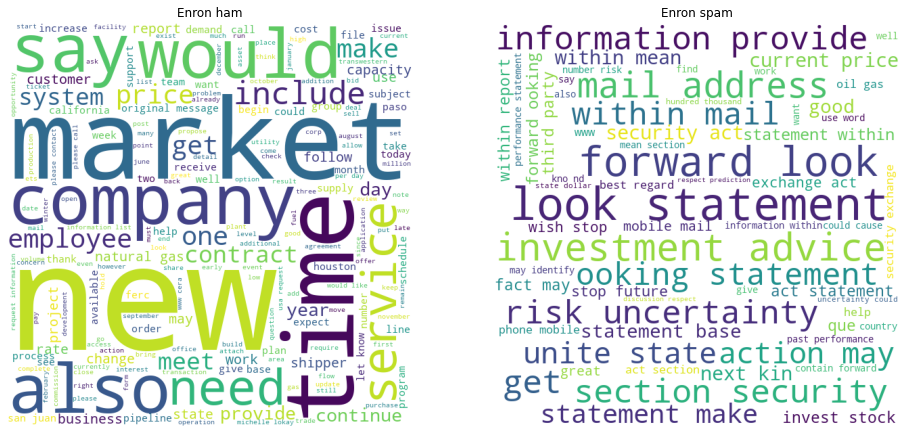

In [82]:
input_txt_ham = " ".join([" ".join(list_of_words) for list_of_words in df_enr['txt_tkn'][df_enr['cat']=='ham']])
input_txt_spam = " ".join([" ".join(list_of_words) for list_of_words in df_enr['txt_tkn'][df_enr['cat']=='spam']])
#input_txt = " ".join(df_ass['txt'])

wordcloud_ham = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_ham)

wordcloud_spam = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_spam)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8))

plt.subplot(1,2,1)
plt.imshow(wordcloud_ham)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron ham')

plt.subplot(1,2,2)
plt.imshow(wordcloud_spam)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron spam')
 
plt.show()

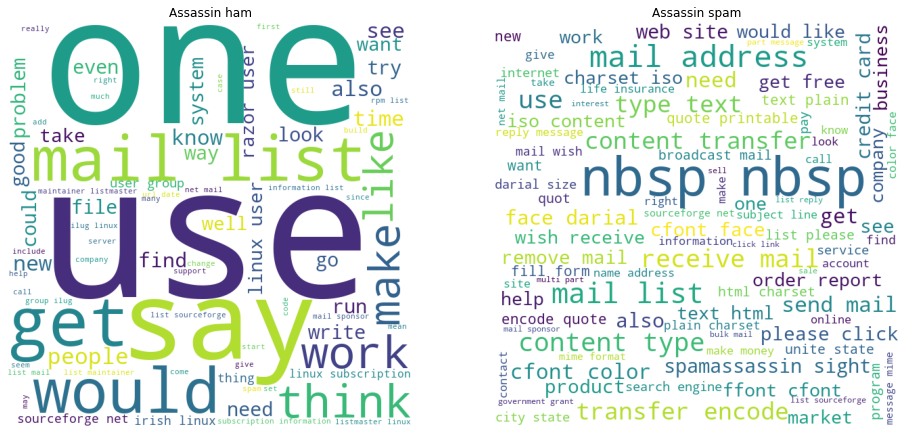

In [83]:
input_txt_ham = " ".join([" ".join(list_of_words) for list_of_words in df_ass['txt_tkn'][df_ass['cat']=='ham']])
input_txt_spam = " ".join([" ".join(list_of_words) for list_of_words in df_ass['txt_tkn'][df_ass['cat']=='spam']])
#input_txt = " ".join(df_ass['txt'])

wordcloud_ham = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_ham)

wordcloud_spam = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_spam)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8))

plt.subplot(1,2,1)
plt.imshow(wordcloud_ham)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Assassin ham')

plt.subplot(1,2,2)
plt.imshow(wordcloud_spam)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Assassin spam')
 
plt.show()

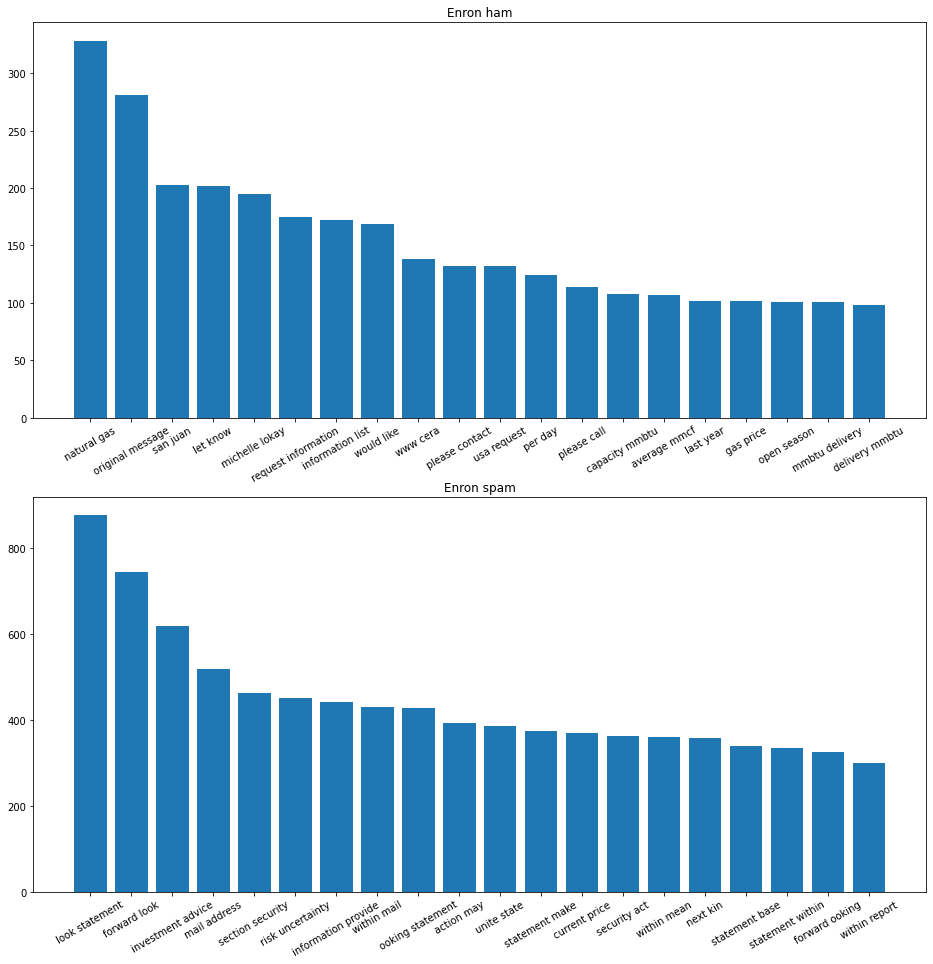

In [84]:
words_ham_ = df_enr['txt_tkn'][df_enr['cat']=='ham']
words_spam_ = df_enr['txt_tkn'][df_enr['cat']=='spam']

words_ham = [wrd for line in words_ham_.tolist() for wrd in line]
words_spam = [wrd for line in words_spam_.tolist() for wrd in line]

bigrams_ham = nltk.bigrams(words_ham)
freq_ham = nltk.FreqDist(bigrams_ham).most_common(20)
freq_ham = pd.Series(dict(freq_ham))

bigrams_spam = nltk.bigrams(words_spam)
freq_spam = nltk.FreqDist(bigrams_spam).most_common(20)
freq_spam = pd.Series(dict(freq_spam))

plt.figure(figsize = (16, 16))

plt.subplot(2,1,1)

y = freq_ham.values
x = [ b[0]+' '+b[1] for b in freq_ham.index]

plt.bar(x,y)
plt.xticks(rotation=30);
plt.title('Enron ham')

plt.subplot(2,1,2)

y = freq_spam.values
x = [ b[0]+' '+b[1] for b in freq_spam.index]

plt.bar(x,y)
plt.xticks(rotation=30);
plt.title('Enron spam')
 
plt.show()

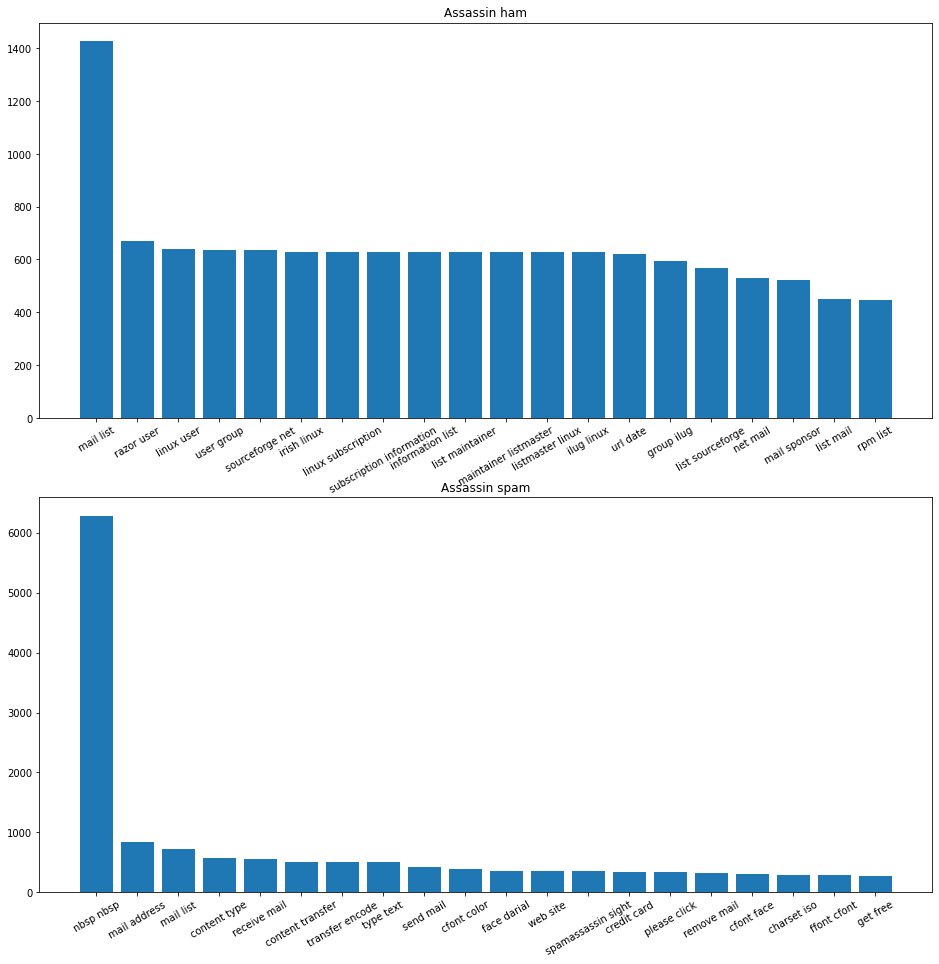

In [85]:
words_ham_ = df_ass['txt_tkn'][df_ass['cat']=='ham']
words_spam_ = df_ass['txt_tkn'][df_ass['cat']=='spam']

words_ham = [wrd for line in words_ham_.tolist() for wrd in line]
words_spam = [wrd for line in words_spam_.tolist() for wrd in line]

bigrams_ham = nltk.bigrams(words_ham)
freq_ham = nltk.FreqDist(bigrams_ham).most_common(20)
freq_ham = pd.Series(dict(freq_ham))

bigrams_spam = nltk.bigrams(words_spam)
freq_spam = nltk.FreqDist(bigrams_spam).most_common(20)
freq_spam = pd.Series(dict(freq_spam))

plt.figure(figsize = (16, 16))

plt.subplot(2,1,1)

y = freq_ham.values
x = [ b[0]+' '+b[1] for b in freq_ham.index]

plt.bar(x,y)
plt.xticks(rotation=30);
plt.title('Assassin ham')

plt.subplot(2,1,2)

y = freq_spam.values
x = [ b[0]+' '+b[1] for b in freq_spam.index]

plt.bar(x,y)
plt.xticks(rotation=30);
plt.title('Assassin spam')
 
plt.show()

## Feature Extraction 

## Classification

In [87]:


(x_train,x_test,y_train,y_test)=train_test_split(df_enr['txt_tkn'],df_enr['cat'],test_size=0.2)


In [89]:
x_train.head()

660     [company, user, password, duke, duke, kyg, epr...
2389    [offshore, online, pharm, warehouse, save, vla...
1542    [hellohere, program, award, degree, diploma, l...
3334    [utf, test, program, name, utf, must, say, unr...
3825    [bocconia, risible, miniver, boil, romantic, p...
Name: txt_tkn, dtype: object

In [91]:
# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
x_train_features = vectorizer.fit_transform(x_train.apply(lambda x: " ".join(x) ))
x_test_features = vectorizer.transform(x_test.apply(lambda x: " ".join(x) ))

In [ ]:
vectorizer.vocabulary_

### Naive Bayes classifier

In [93]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train_features.toarray() ,y_train)

# Output of the score is the accuracy of the prediction
# Accuracy: 0.995
print("Training accuracy: ", clf.score(x_train_features.toarray(),y_train))
# Accuracy: 0.932
print("Testing accuracy: ", clf.score(x_test_features.toarray(),y_test))

Training accuracy:  0.9912645590682196
Testing accuracy:  0.937603993344426


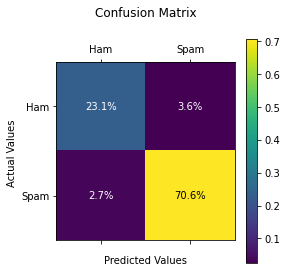

In [117]:
y_pred = clf.predict(x_test_features.toarray())

conf_mat = confusion_matrix(y_test, y_pred) / len(y_test)

plt.matshow(conf_mat)

plt.title('Confusion Matrix\n\n')
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values ')

plt.colorbar()

plt.xticks([0,1],['Ham','Spam'])
plt.yticks([0,1], ['Ham','Spam'])

plt.text(0, 0, '{:0.1f}%'.format(conf_mat[0][0]*100), ha='center', va='center', c='w')
plt.text(0, 1, '{:0.1f}%'.format(conf_mat[0][1]*100), ha='center', va='center', c='w')
plt.text(1, 0, '{:0.1f}%'.format(conf_mat[1][0]*100), ha='center', va='center', c='w')
plt.text(1, 1, '{:0.1f}%'.format(conf_mat[1][1]*100), ha='center', va='center')

plt.show()
